In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df=pd.read_csv('quikr_car.csv')

In [3]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [4]:
df.shape

(892, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [6]:
df.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

##### Creating backup copy

In [7]:
backup=df.copy()

## Cleaning Data 

In [8]:
df['year'].value_counts()

2015    117
2013     94
2014     94
2016     76
2012     75
       ... 
e...      1
k...      1
odel      1
emi       1
r 15      1
Name: year, Length: 61, dtype: int64

In [9]:
df=df[df['year'].str.isnumeric()]

In [10]:
df['year']=df['year'].astype(int)

In [11]:
df['Price'].value_counts()

Ask For Price    23
2,50,000         16
3,50,000         12
4,00,000         11
1,80,000         11
                 ..
4,88,000          1
5,65,000          1
10,74,999         1
5,99,000          1
49,000            1
Name: Price, Length: 273, dtype: int64

In [12]:
df=df[df['Price']!='Ask For Price']

In [13]:
df['Price']=df['Price'].str.replace(',','').astype(int)

In [14]:
df['kms_driven'].value_counts()

45,000 kms    30
35,000 kms    29
55,000 kms    25
50,000 kms    23
20,000 kms    21
              ..
28,600 kms     1
57,923 kms     1
24,800 kms     1
24,330 kms     1
33,333 kms     1
Name: kms_driven, Length: 250, dtype: int64

In [15]:
df['kms_driven']=df['kms_driven'].str.split().str.get(0).str.replace(',','')

In [16]:
df=df[df['kms_driven'].str.isnumeric()]

In [17]:
df['kms_driven']=df['kms_driven'].astype(int)

#### fuel_type has nan values

In [18]:
df['fuel_type'].value_counts()

Petrol    428
Diesel    386
LPG         2
Name: fuel_type, dtype: int64

In [19]:
df=df[~df['fuel_type'].isna()]

In [20]:
df.shape

(816, 6)

#### Company does not need any cleaning now. Changing car names. Keeping only the first three words

In [21]:
df['name']=df['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

#### Resetting the index of the final cleaned data

In [22]:
df=df.reset_index(drop=True)

## Cleaned Data

In [23]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [24]:
df.to_csv('Cleaned_Car_data.csv')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 28.8+ KB


In [26]:
df.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,816,816,816.000000,8.160000e+02,816.000000,816
unique,254,25,NaN,NaN,NaN,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,51,221,NaN,NaN,NaN,428
mean,NaN,NaN,2012.444853,4.117176e+05,46275.531863,NaN
std,NaN,NaN,4.002992,4.751844e+05,34297.428044,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN
75%,NaN,NaN,2015.000000,4.912500e+05,56818.500000,NaN


In [27]:
df=df[df['Price']<6000000]

### Checking relationship of Company with Price

In [28]:
df['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

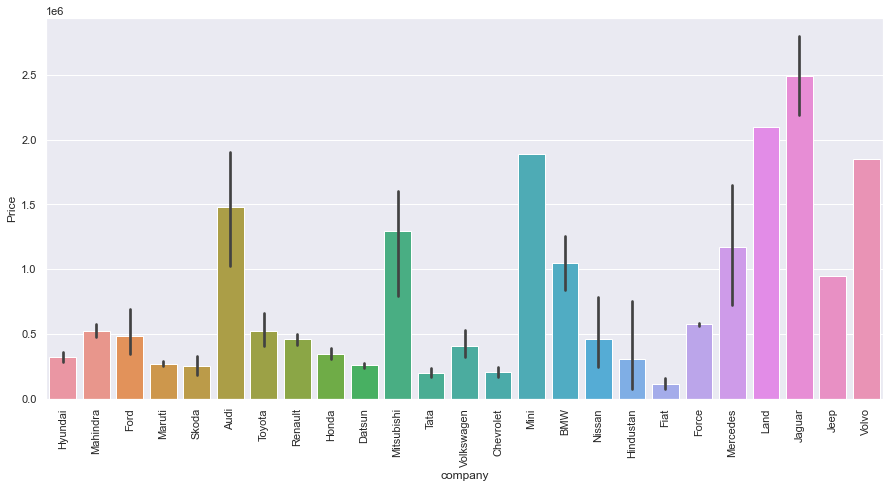

In [29]:
plt.figure(figsize=(15,7))
sns.barplot(x='company',y='Price',data=df)
plt.xticks(rotation='vertical')
plt.show()

### Checking relationship of Year with Price

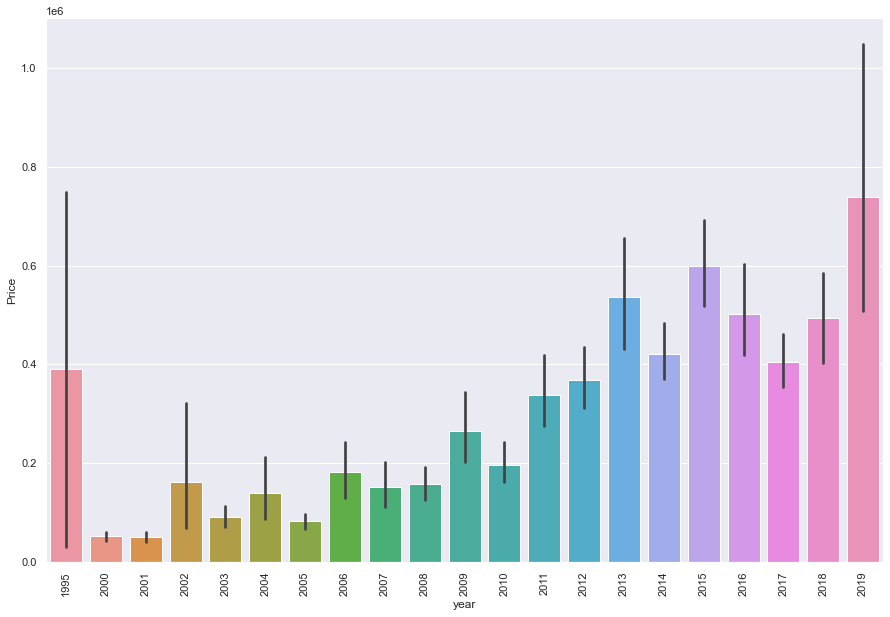

In [30]:
plt.figure(figsize=(15,10))
sns.barplot(x='year',y='Price',data=df)
plt.xticks(rotation='vertical')
plt.show()

### Checking relationship of kms_driven with Price

<AxesSubplot:xlabel='kms_driven', ylabel='Price'>

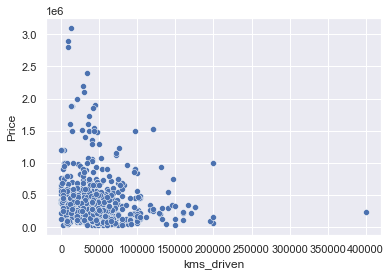

In [31]:
sns.scatterplot(x='kms_driven',y='Price',data=df)

### Checking relationship of Fuel Type with Price

<AxesSubplot:xlabel='fuel_type', ylabel='Price'>

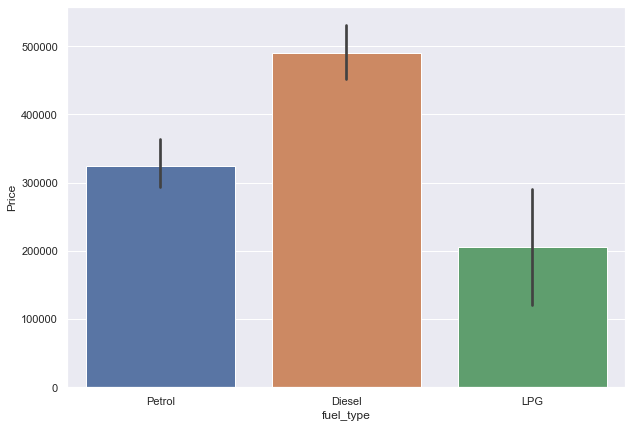

In [32]:
plt.subplots(figsize=(10,7))
sns.barplot(x='fuel_type',y='Price',data=df)

In [33]:
df['name'].value_counts()

Maruti Suzuki Swift         51
Maruti Suzuki Alto          42
Maruti Suzuki Wagon         28
Maruti Suzuki Ertiga        16
Hyundai Grand i10           15
                            ..
Nissan Micra XV              1
Nissan X Trail               1
Honda Brio VX                1
Hyundai Sonata Transform     1
Maruti Suzuki A              1
Name: name, Length: 254, dtype: int64

<AxesSubplot:xlabel='Price', ylabel='Count'>

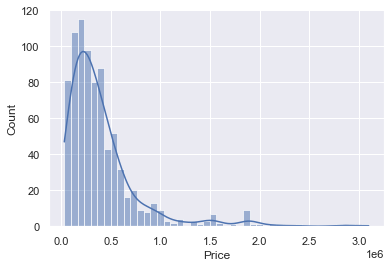

In [34]:
sns.histplot(df['Price'],kde=True)

<AxesSubplot:>

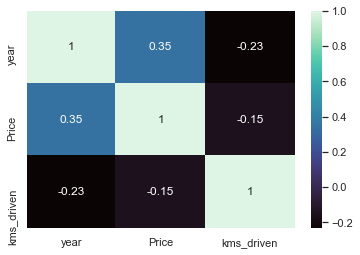

In [35]:
sns.heatmap(df.corr(), annot=True, cmap='mako')

C:\Users\sid10\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

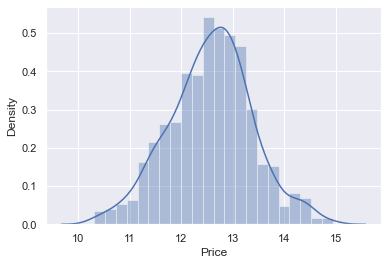

In [36]:
sns.distplot(np.log(df['Price']))

### Extracting Training Data

In [37]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [38]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
812,Tata Indica V2,Tata,2009,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,132000,Petrol
814,Tata Zest XM,Tata,2018,27000,Diesel


In [39]:
y

0      11.289782
1      12.959844
2      12.691580
3      13.262125
4      12.072541
         ...    
811    12.506177
812    11.608236
813    12.611538
814    12.468437
815    12.873902
Name: Price, Length: 815, dtype: float64

### Applying Train Test Split

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=80)

In [41]:
X_train

,name,company,year,kms_driven,fuel_type
360,Maruti Suzuki Zen,Maruti,2003,69900,Petrol
734,Toyota Corolla,Toyota,2006,40000,Petrol
91,Maruti Suzuki A,Maruti,2011,12500,Petrol
584,Skoda Octavia Classic,Skoda,2006,65000,Diesel
548,Mahindra Jeep MM,Mahindra,2004,383,Diesel
...,...,...,...,...,...
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
522,Chevrolet Beat PS,Chevrolet,2012,65422,Diesel
211,Mahindra Jeep CL550,Mahindra,2019,0,Diesel
188,Mahindra Scorpio SLX,Mahindra,2007,75000,Diesel


In [42]:
y

0      11.289782
1      12.959844
2      12.691580
3      13.262125
4      12.072541
         ...    
811    12.506177
812    11.608236
813    12.611538
814    12.468437
815    12.873902
Name: Price, Length: 815, dtype: float64

### Model Training

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

In [45]:
ohe = OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [46]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',categories=ohe.categories_),[0,1,4])
],remainder='passthrough')

step2 = LinearRegression()

pipe1 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe1.fit(X_train,y_train)

y_pred = pipe1.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score -17967974729881.344
MAE 445257.87447705556


In [47]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',categories=ohe.categories_),[0,1,4])
],remainder='passthrough')

step2 = SVR()

pipe2 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe2.fit(X_train,y_train)

y_pred = pipe2.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.02644443805049479
MAE 0.5739423288224733


In [48]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',categories=ohe.categories_),[0,1,4])
],remainder='passthrough')

step2 = DecisionTreeRegressor()

pipe3 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe3.fit(X_train,y_train)

y_pred = pipe3.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.4723262839844885
MAE 0.34839158676638937


In [49]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',categories=ohe.categories_),[0,1,4])
],remainder='passthrough')

step2 = RandomForestRegressor()

pipe4 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe4.fit(X_train,y_train)

y_pred = pipe4.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.6138221963129902
MAE 0.3174180246003186


In [50]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',categories=ohe.categories_),[0,1,4])
],remainder='passthrough')

step2 = AdaBoostRegressor()

pipe5 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe5.fit(X_train,y_train)

y_pred = pipe5.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.45326026170988565
MAE 0.437705877969132


In [51]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',categories=ohe.categories_),[0,1,4])
],remainder='passthrough')

step2 = KNeighborsRegressor()

pipe6 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe6.fit(X_train,y_train)

y_pred = pipe6.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.2939031903282885
MAE 0.49203777055727427


In [52]:
scores=[]
for i in range(300):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first',categories=ohe.categories_),[0,1,4])],remainder='passthrough')
    step2 = RandomForestRegressor()
    pipe=Pipeline([('step1',step1),('step2',step2)])
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [53]:
np.argmax(scores)

291

In [54]:
scores[np.argmax(scores)]

0.8050181253186426

### The best model is found at a this random state

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=np.argmax(scores))
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first',categories=ohe.categories_),[0,1,4])],remainder='passthrough')
step2 = RandomForestRegressor()
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.7955771588573708

In [56]:
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))